In [1]:
import stream2 as st2
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/__init__.py:70: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/__init__.py:70: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/__init__.py:70: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  return modu

In [24]:
#adata = sc.read("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Matrix/data_p3.h5ad")
#if 'neighbors' in adata.uns:
#    if 'distances' in adata.uns['neighbors']:
#        adata.obsp['distances'] = adata.uns['neighbors'].pop('distances')
#    if 'connectivities' in adata.uns['neighbors']:
#        adata.obsp['connectivities'] = adata.uns['neighbors'].pop('connectivities')

#adata.write("data_inter.h5ad")
#print(adata)

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/_io/h5ad.py:266: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{


AnnData object with n_obs × n_vars = 55717 × 18723
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'timepoint', 'doublet_finder', 'percent.mt', 'qc_pass', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA.weight', 'ADT.weight', 'wsnn_res.0.3', 'SingleR', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'mapping.score', 'manual_annotation', 'final_annot'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable', 'vf_vst_counts_rank', 'var.features', 'var.features.rank'
    uns: 'neighbors'
    obsm: 'X_integrated_dr', 'X_pca', 'X_ref.umap', 'X_tsne', 'X_umap', 'X_wnn.umap'
    varm: 'PCs'
    obsp: 'distances'


In [2]:
adata = sc.read("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Matrix/data_inter.h5ad")

In [41]:
# Add metadata Annotation (with the intermediate pop annotated) 
metadata = pd.read_csv("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Matrix/metadata_annotation.csv", index_col=0)
metadata_aligned = metadata.reindex(adata.obs.index)
adata.obs['Annotation'] = metadata['Annotation']

Index(['D1_AAACCCAAGGCATTTC-1', 'D1_AAACCCACACTGGAAG-1',
       'D1_AAACCCACATCACCAA-1', 'D1_AAACCCAGTTAGGAGC-1',
       'D1_AAACCCATCATTACTC-1'],
      dtype='object')
Index(['D1_AAACCCAAGCTCCCTT-1', 'D1_AAACCCAAGGCATTTC-1',
       'D1_AAACCCACACTGGAAG-1', 'D1_AAACCCACATCACCAA-1',
       'D1_AAACCCAGTTAGGAGC-1'],
      dtype='object')
Nombre de cellules dans adata : 44736
Nombre de cellules alignées dans metadata : 44736
Index(['D1_AAACCCAAGGCATTTC-1', 'D1_AAACCCACACTGGAAG-1',
       'D1_AAACCCACATCACCAA-1', 'D1_AAACCCAGTTAGGAGC-1',
       'D1_AAACCCATCATTACTC-1'],
      dtype='object')
Index(['D1_AAACCCAAGGCATTTC-1', 'D1_AAACCCACACTGGAAG-1',
       'D1_AAACCCACATCACCAA-1', 'D1_AAACCCAGTTAGGAGC-1',
       'D1_AAACCCATCATTACTC-1'],
      dtype='object')


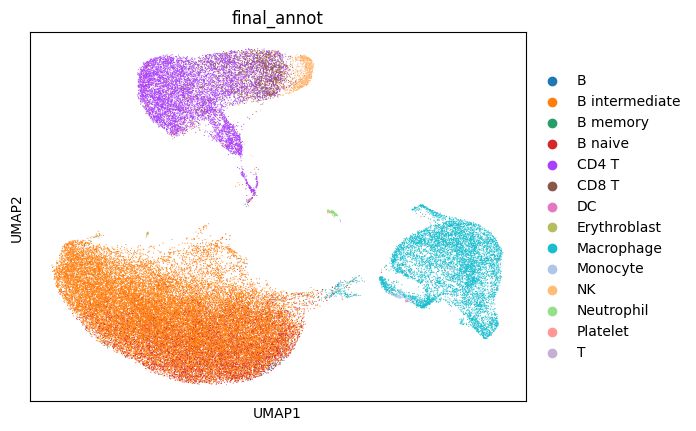

In [3]:
sc.pl.umap(adata,color=['final_annot'])

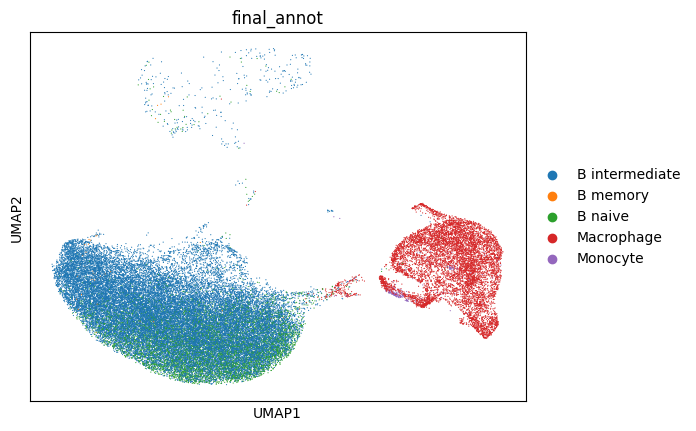

In [3]:
cell_types_to_keep = [ 'B intermediate', 'B memory', 'B naive', 'Monocyte', 'Macrophage']
adata = adata[adata.obs['final_annot'].isin(cell_types_to_keep)].copy()
sc.pl.umap(adata,color=['final_annot'])

Found 1 components


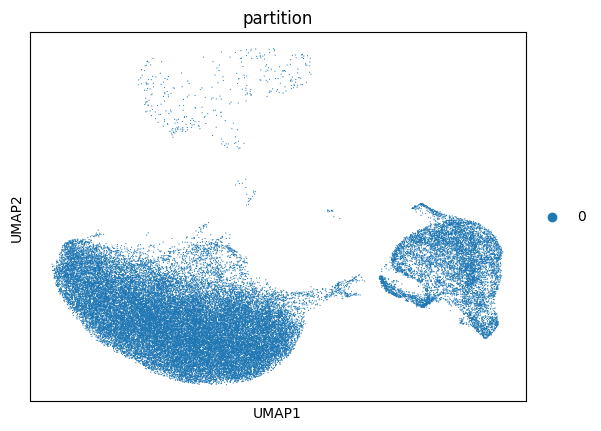

In [9]:
sc.pp.neighbors(adata,use_rep='X_pca')
sc.tl.leiden(adata)
st2.tl.find_disconnected_components(adata,groups='leiden')
sc.pl.umap(adata,color='partition')

<Axes: xlabel='partition'>

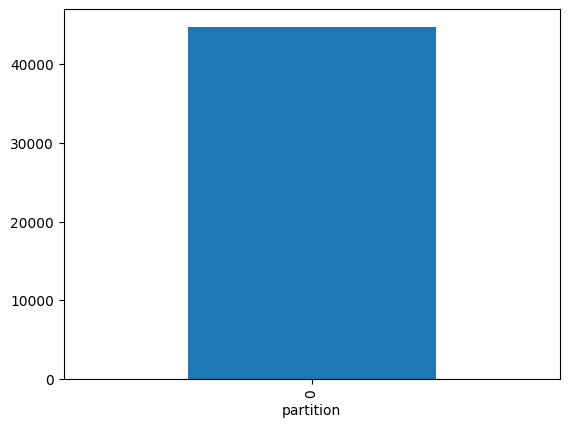

In [13]:
adata.obs['partition'].value_counts().plot.bar()

Seeding initial graph for each partition...
Learning elastic principal graph for each partition...
Maximum number of iterations ( 10 ) has been reached. diff =  0.017458643656600485


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


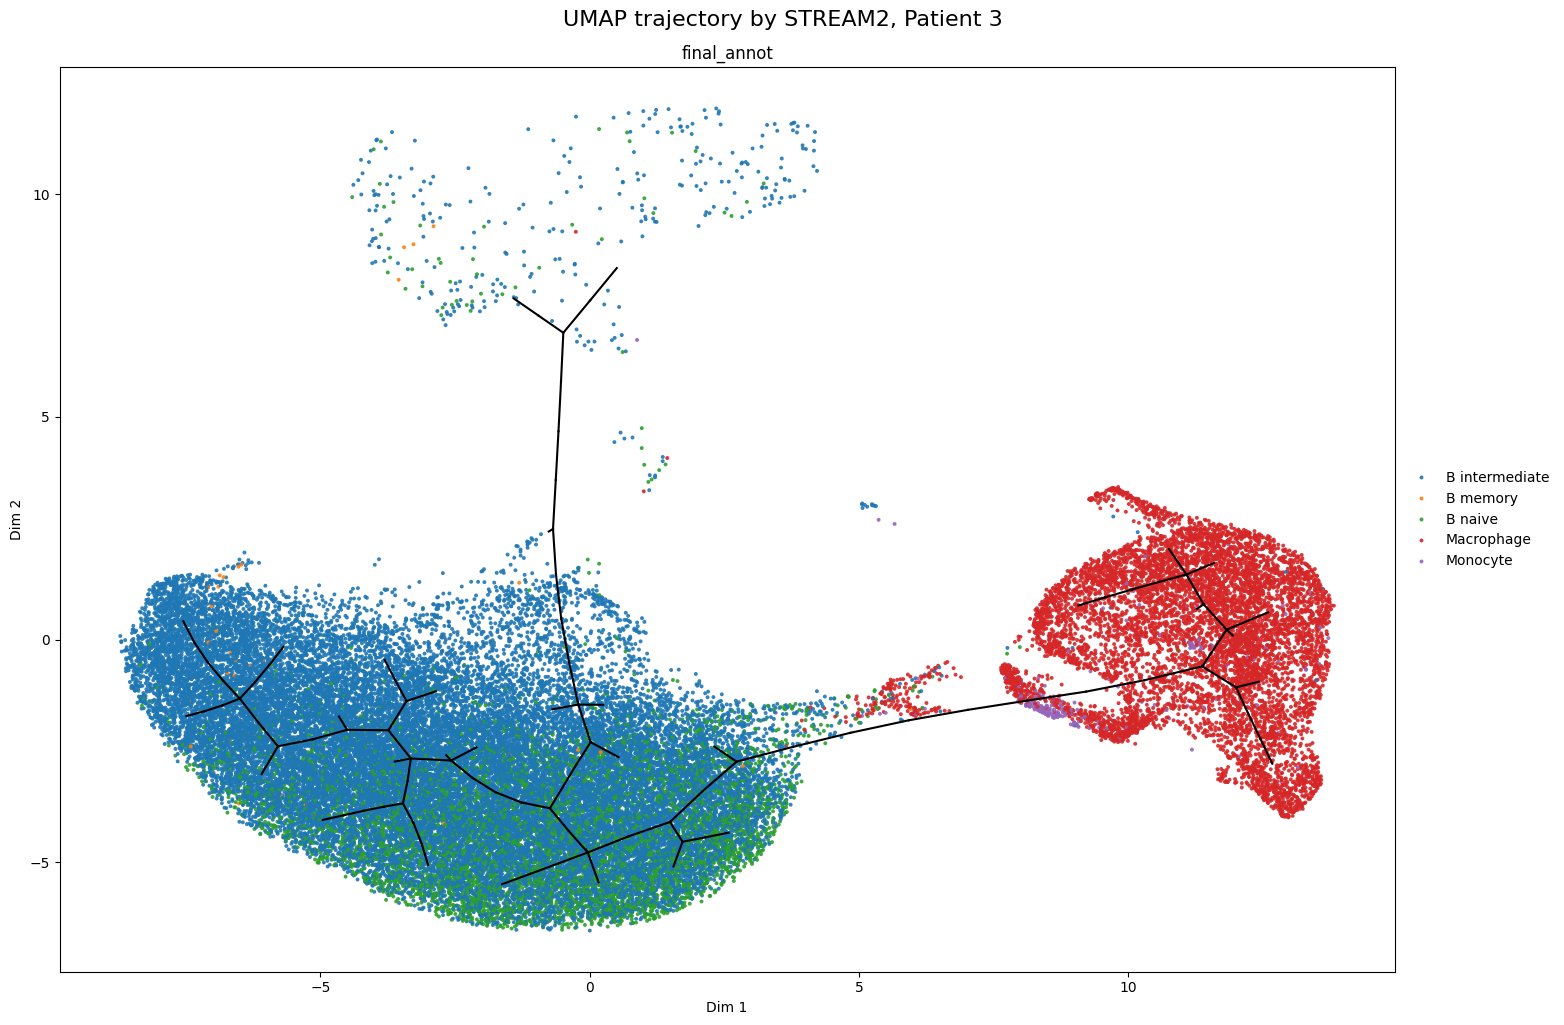

In [11]:
use_partition=['0']
st2.tl.seed_graph(adata, obsm='X_umap', n_clusters=100,use_partition=use_partition)
st2.tl.learn_graph(adata, obsm='X_umap', n_nodes=60,epg_alpha=0.01,epg_mu=0.2,use_partition=use_partition)
st2.pl.graph(adata,key='epg',color=['final_annot'],fig_size=(15,10),save_fig=False)
plt.suptitle("UMAP trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_p3.png", dpi=300, bbox_inches='tight')

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


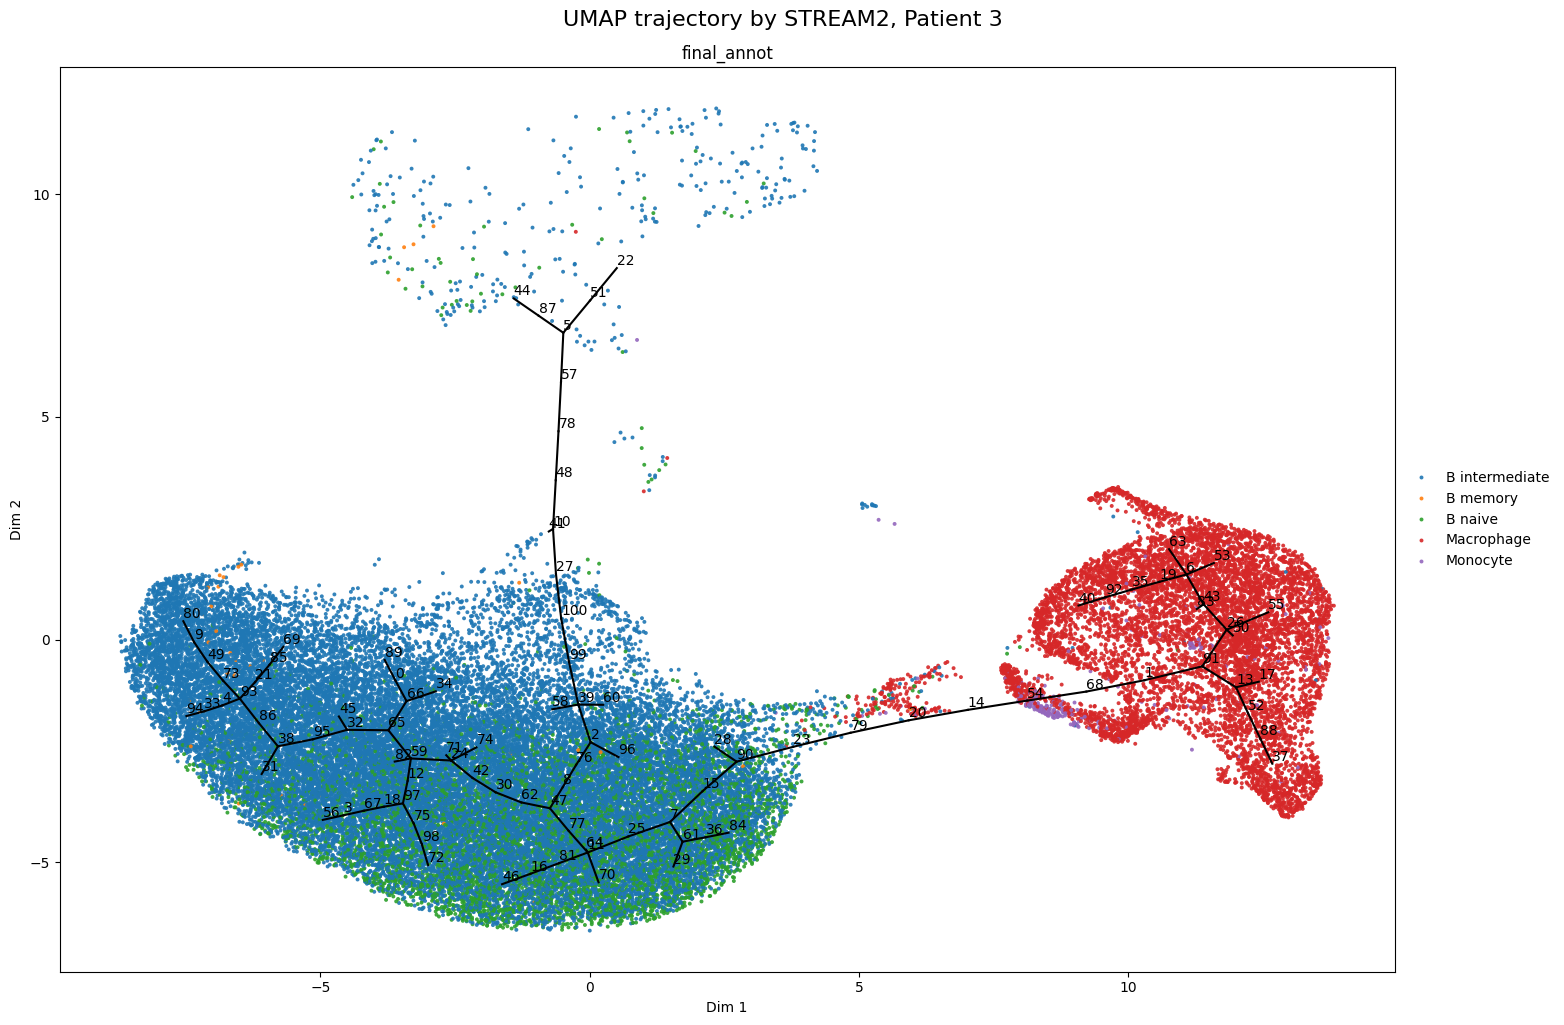

In [13]:
st2.tl._elpigraph._store_graph_attributes(adata,adata.obsm['X_umap'],'epg')
st2.pl.graph(adata,key='epg',color=['final_annot'],show_text=True,fig_size=(15,10),save_fig=False)
plt.suptitle("UMAP trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_v2_p3.png", dpi=300, bbox_inches='tight')

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:940: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


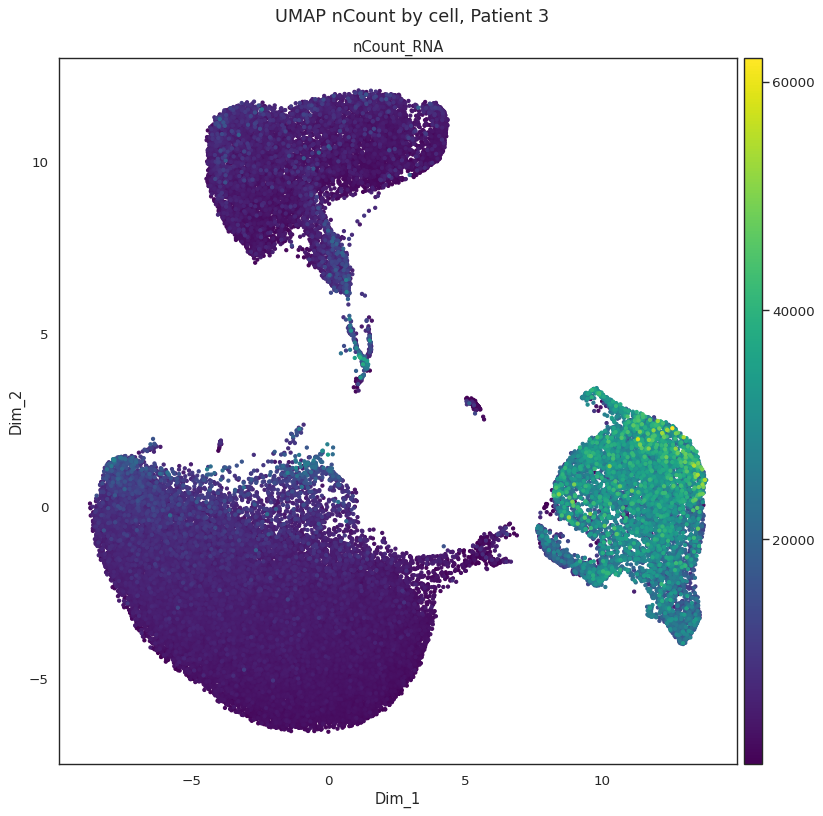

In [3]:
adata.obsm['X_dr'] = adata.obsm['X_umap']
st2.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

st2.pl.dimension_reduction(adata,color=['nCount_RNA'],
                           fig_legend_ncol=2, fig_size=(10,10))
plt.suptitle("UMAP nCount by cell, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/ncount_p3.png", dpi=300, bbox_inches='tight')

In [16]:
st2.tl.seed_graph(adata, obsm='X_dr', n_clusters=15)
st2.tl.learn_graph(adata, obsm='X_dr', n_nodes=20, method='principal_tree',)

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1434: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:370: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  if 'stream_tree' not in adata.uns_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:399: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update t

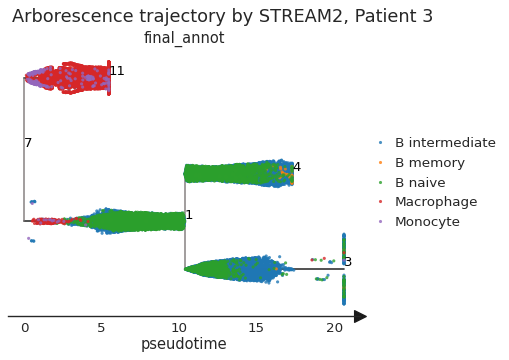

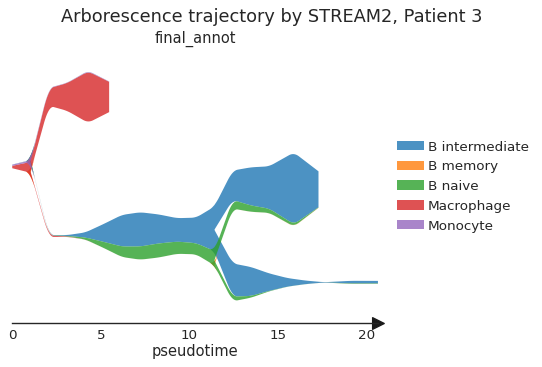

In [33]:
st2.pl.stream_sc(adata, source=7, 
                 dist_scale=0.2, 
                 color=['final_annot'],
                 fig_ncol=2,
                 fig_legend_ncol=1,
                 save_fig=False)
plt.suptitle("Arborescence trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p3_arbo_pnt.png", dpi=300, bbox_inches='tight')
st2.pl.stream(adata, source=7, 
                 dist_scale=0.8, 
                 color=['final_annot'],
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p3_arbo.png", dpi=300, bbox_inches='tight')

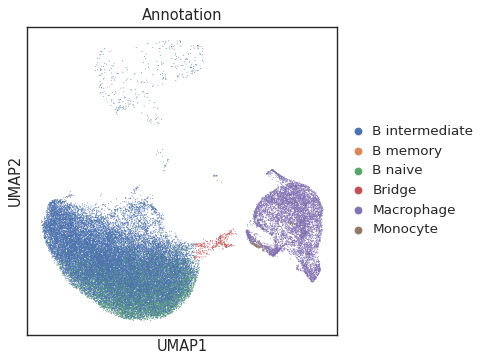

Found 1 components


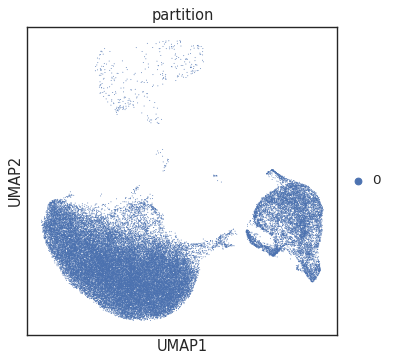

Seeding initial graph for each partition...


KeyError: 'node_partition'

In [50]:
sc.pl.umap(adata,color=['Annotation'])
cell_types_to_keep = [ 'B intermediate', 'B memory', 'B naive', 'Monocyte', 'Macrophage','Bridge']
adata = adata[adata.obs['Annotation'].isin(cell_types_to_keep)].copy()
sc.pp.neighbors(adata,use_rep='X_pca')
sc.tl.leiden(adata)
st2.tl.find_disconnected_components(adata,groups='leiden')
sc.pl.umap(adata,color='partition')

use_partition=['0']
st2.tl.seed_graph(adata, obsm='X_umap', n_clusters=50,use_partition=use_partition)
st2.tl.learn_graph(adata, obsm='X_umap', n_nodes=30,epg_alpha=0.01,epg_mu=0.2,use_partition=use_partition)
st2.pl.graph(adata,key='epg',color=['Annotation'],fig_size=(15,10),save_fig=False)
plt.suptitle("UMAP trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
#plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_p3.png", dpi=300, bbox_inches='tight')

st2.tl._elpigraph._store_graph_attributes(adata,adata.obsm['X_umap'],'epg')
st2.pl.graph(adata,key='epg',color=['final_annot'],show_text=True,fig_size=(15,10),save_fig=False)
plt.suptitle("UMAP trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
#plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_v2_p3.png", dpi=300, bbox_inches='tight')

st2.tl.seed_graph(adata, obsm='X_dr', n_clusters=15)
st2.tl.learn_graph(adata, obsm='X_dr', n_nodes=20, method='principal_tree',)

st2.pl.stream_sc(adata, source=7, 
                 dist_scale=0.2, 
                 color=['final_annot'],
                 fig_ncol=2,
                 fig_legend_ncol=1,
                 save_fig=False)
plt.suptitle("Arborescence trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
#plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p3_arbo_pnt.png", dpi=300, bbox_inches='tight')
st2.pl.stream(adata, source=7, 
                 dist_scale=0.8, 
                 color=['final_annot'],
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
#plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p3_arbo.png", dpi=300, bbox_inches='tight')

In [ ]:
adata.obsm['X_dr'] = adata.obsm['X_umap']
adata.obs['pseudotime_partition'] = np.nan
for part in ['0', '1', '2']:
    cells = adata.obs_names[adata.obs['partition'] == part]
    adata_sub = adata[cells].copy()

    st2.tl.seed_graph(adata_sub, obsm='X_umap', n_clusters=50)

    st2.tl.learn_graph(adata_sub, obsm='X_dr', n_nodes=60, method='principal_tree',)
    
    st2.tl.infer_pseudotime(
        adata_sub,
        source=1,
        key='epg',
        copy=False
    )

    adata.obs.loc[cells, 'pseudotime_partition'] = adata_sub.obs['epg_pseudotime']

adata.obsm['X_dr'] = adata.obsm['X_umap']
st2.pl.dimension_reduction(adata, color=['pseudotime_partition'])
plt.suptitle("UMAP trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
plt.savefig("Plots/p3.png", dpi=300, bbox_inches='tight')

In [ ]:
st2.tl.seed_graph(adata,obsm='X_umap',use_partition=True)
st2.pl.graph(adata,key='seed_epg',color=['final_annot'])
st2.tl.learn_graph(adata,obsm='X_umap', n_nodes=30,use_partition=True)
st2.pl.graph(adata,key='epg',color=['final_annot'])
st2.pl.graph(adata,key='epg',color=['partition'])
use_partition=['0','1','2']
st2.tl.seed_graph(adata, obsm='X_umap', n_clusters=50,use_partition=use_partition)
st2.tl.learn_graph(adata, obsm='X_umap', n_nodes=60,epg_alpha=0.01,epg_mu=0.05,use_partition=use_partition)
st2.pl.graph(adata,key='seed_epg',color=['partition'])
st2.pl.graph(adata,key='epg',color=['final_annot'],fig_size=(15,10),save_fig=True,fig_path='Plots/',fig_name='stream2_p3.pdf')

In [ ]:
sadata = st2.tl.get_component(adata,'0')
st2.tl._elpigraph._store_graph_attributes(sadata,sadata.obsm['X_umap'],'epg')
st2.pl.graph(sadata,key='epg',color=['final_annot'],show_text=True)

sadata = st2.tl.get_component(adata,'1')
st2.tl._elpigraph._store_graph_attributes(sadata,sadata.obsm['X_umap'],'epg')
st2.pl.graph(sadata,key='epg',color=['final_annot'],show_text=True)

sadata = st2.tl.get_component(adata,'2')
st2.tl._elpigraph._store_graph_attributes(sadata,sadata.obsm['X_umap'],'epg')
st2.pl.graph(sadata,key='epg',color=['final_annot'],show_text=True)

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1434: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:370: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  if 'stream_tree' not in adata.uns_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:399: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update t

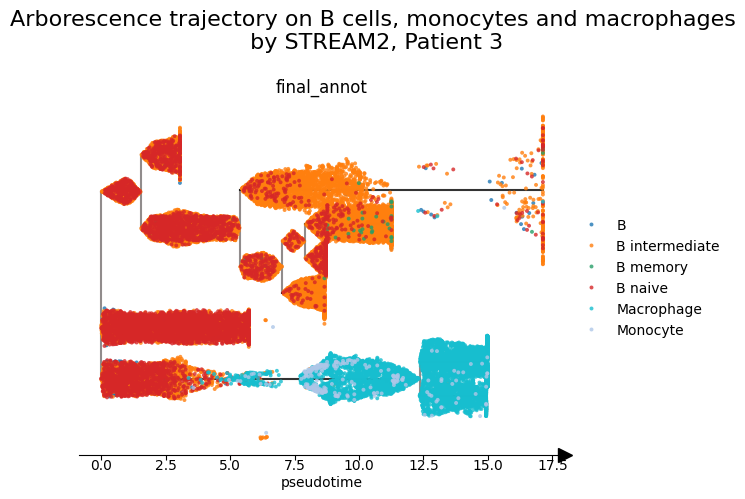

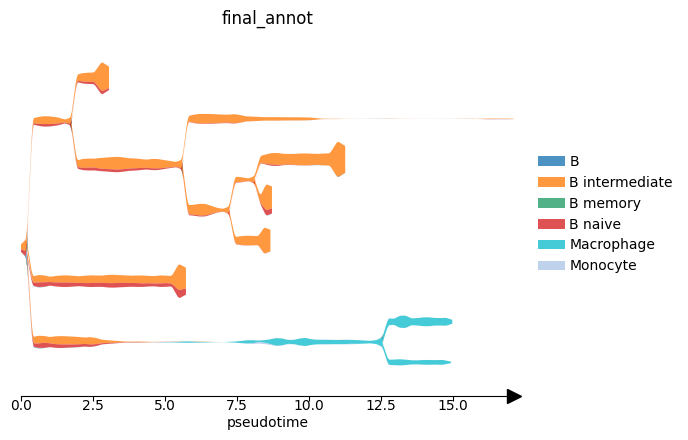

In [44]:
cell_types_to_keep = ['Macrophage', 'Monocyte', 'B', 'B intermediate', 'B memory', 'B naive']
adata_subset = adata[adata.obs['final_annot'].isin(cell_types_to_keep)].copy()
st2.tl.seed_graph(adata_subset, obsm='X_umap', n_clusters=50)
st2.tl.learn_graph(adata_subset, obsm='X_umap', n_nodes=60,epg_alpha=0.01,epg_mu=0.05)
st2.pl.stream_sc(adata_subset, source=8, color=['final_annot'], fig_legend_ncol=1,save_fig=False,show_text=False)
plt.suptitle("Arborescence trajectory on B cells, monocytes and macrophages\n by STREAM2, Patient 3", fontsize=16, y=1.12)
plt.savefig("Plots/p3_arbobis.png", dpi=300, bbox_inches='tight')
st2.pl.stream(adata_subset, source=8, 
              color=['final_annot'],
              fig_legend_ncol=1)